In [1]:
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt

#Text Color
from termcolor import colored


## SKLearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import warnings
from transformers import logging as hf_logging
hf_logging.set_verbosity_error() # Hidding Huggingface Warnings
warnings.filterwarnings("ignore")

import keras

from transformers import BertTokenizer
from tqdm.auto import tqdm

import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"D:\Pranav_Files\Northwestern University\Classes\MSDS_498_Capstone_Project\Data and Git\Capstone_Project\data\Final_data\new_reduced_data_nov_1.csv")
df

,final_cleaned_text,class,selftext_length,final_final_cleaned_text
0,turn year feel scary old wish time different p...,depression,145,turn year feel scary old wish time different p...
1,okay trigger warn wazoo drink week fairly far ...,depression,1479,okay trigger warn wazoo drink week fairly far ...
2,disable abusive parent long distance relations...,depression,425,disable abusive parent long distance relations...
3,hello kind person lot suicidal think barely al...,depression,109,hello kind person lot suicidal think barely al...
4,find increasingly upset term existence crazy h...,depression,505,find increasingly upset term existence crazy h...
...,...,...,...,...
23539,relate count tell close friend dead turn decem...,suicide,584,relate count tell close friend dead turn decem...
23540,alive anymore genuinely think end life time po...,suicide,698,alive anymore genuinely think end life time po...
23541,want die headache cry hard friend know friend ...,suicide,187,want die headache cry hard friend know friend ...
23542,friend try commit suicide friend try commit su...,suicide,162,friend try commit suicide friend try commit su...


In [3]:
MODEL_NAME = 'distilbert-base-cased'


In [4]:
df["label"]=df["class"]

df.loc[df["class"] == "casual-talk", "label"] = 0
df.loc[df["class"] == "depression", "label"] = 1
df.loc[df["class"] == "suicide", "label"] = 2
df.loc[df["class"] == "high-suicidal", "label"] = 3

In [5]:
df["label"].value_counts(ascending=True)

3      192
0     3753
1     4543
2    15056
Name: label, dtype: int64

In [6]:
## Splitting data to X and Y

X=df["final_final_cleaned_text"].astype(str)
Y= df['label']
num_classes = max(Y)+1
print('# of Classes: {}'.format(num_classes))

# of Classes: 4


In [7]:
data=pd.DataFrame()
data["X"]=df["final_final_cleaned_text"].astype(str)
data["Y"]=df['class']

In [8]:
train_df,test_df= train_test_split(data,
                                   train_size=0.70, 
                                   shuffle=True, 
                                   random_state=42, 
                                   stratify=Y)

In [9]:
max_words = []
for row in data['X']:
    max_words.append(len(row.split()))
print(f"The max word count is {np.asarray(max_words).max()}")

The max word count is 1435


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_df['Sentiment_label'] = le.fit_transform(train_df['Y'])
test_df['Sentiment_label'] = le.transform(test_df['Y'])


In [11]:
label_dict = (test_df[['Y','Sentiment_label']].drop_duplicates()
              .sort_values(by='Sentiment_label')
              .reset_index(drop=True)['Y']
              .to_dict())

for index, key in label_dict.items():
    print(index, key)

0 casual-talk
1 depression
2 high-suicidal
3 suicide


In [12]:
# train_df,test_df= train_test_split(data,
#                                    train_size=0.60, 
#                                    shuffle=True, 
#                                    random_state=42, 
#                                    stratify=Y)

In [13]:
len(train_df)

16480

In [14]:
train_df

,X,Y,Sentiment_label
6859,long time attend class campus class available ...,casual-talk,0
20195,paranoid thing kill know know strong people th...,suicide,3
19701,fort matter life lean suicide want sound ungra...,suicide,3
5021,bye outside comment outside bye,casual-talk,0
3137,hey guy want throw interested look start group...,depression,1
...,...,...,...
21298,brother friend depend believe people pas think...,suicide,3
18632,single person meet hospital rough time life ho...,suicide,3
21977,matter time neglectful bitch kid sick cat sick...,suicide,3
16110,regretful goodbye minute hour commit suicide w...,suicide,3


In [15]:
x_train = train_df['X']
y_train = train_df['Sentiment_label']

In [16]:
# # Get the number training samples
# num_train_samples = int(train_df.shape[0] * 0.8)

# x_train = train_df['X'][:num_train_samples]
# y_train = train_df['Sentiment_label'][:num_train_samples]
# x_val = train_df['X'][num_train_samples:]
# y_val = train_df['Sentiment_label'][num_train_samples:]

# ### Sanity Check
# assert(len(x_train) + len(x_val) == train_df.shape[0])

# print(f"{len(x_train)} training examples\n{len(x_val)} validation examples")

In [17]:
x_test = test_df['X']
y_test = test_df['Sentiment_label']
print(f"{len(x_test)} testing examples")

7064 testing examples


## Naive Bayes (Baseline Model)

In [18]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(x_train, y_train)

### Make predictions
y_hat = model.predict(x_test)

Accuracy: 0.677519818799547


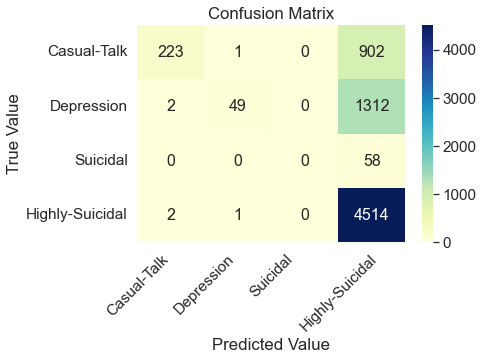

In [19]:
import seaborn as sns
print("Accuracy:", accuracy_score(y_test, y_hat))
labels_5 = ['Casual-Talk','Depression','Suicidal','Highly-Suicidal'] 

def print_cf1(y_test, y_hat):
    cm = confusion_matrix(y_test, y_hat)
    sns.set(font_scale = 1.4, color_codes=True, palette="deep")
    sns.heatmap(pd.DataFrame(cm, index=labels_5,columns=[0,1,2,3]), 
                annot = True,
                annot_kws = {"size":16},
                fmt="d",
                cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Value")
    plt.xticks([0,1,2,3], labels_5, rotation=45)
    plt.ylabel("True Value")
    plt.show()
    
print_cf1(y_test, y_hat)

In [20]:
print(classification_report(y_test, y_hat, target_names=labels_5))

                 precision    recall  f1-score   support

    Casual-Talk       0.98      0.20      0.33      1126
     Depression       0.96      0.04      0.07      1363
       Suicidal       0.00      0.00      0.00        58
Highly-Suicidal       0.67      1.00      0.80      4517

       accuracy                           0.68      7064
      macro avg       0.65      0.31      0.30      7064
   weighted avg       0.77      0.68      0.58      7064



### Distill Bert

In [21]:
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME) # Loading the tokenizer

In [22]:
max_val = 0
for sent in (x_train.tolist() + x_train.tolist()):
    try:
        sent_tok_len = len(tokenizer.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 976


In [23]:
df["final_final_cleaned_text"]=df['final_final_cleaned_text'].astype(str)
df["selftext_length"]= [len(df["final_final_cleaned_text"][i].split()) for i in range(len(df))]
df["selftext_length"].describe()



count    23544.000000
mean        53.403075
std         41.255895
min          1.000000
25%         26.000000
50%         43.000000
75%         73.000000
max       1435.000000
Name: selftext_length, dtype: float64

In [24]:
dd=df[df["selftext_length"]>256]
dd["class"].value_counts()

depression    79
Name: class, dtype: int64

### Since there are only 79 texts with words more than 256, we are setting max len as 256

In [25]:
MODEL_NAME = 'distilbert-base-cased'

MAX_LENGTH = 256

tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [26]:
X_train = tokenize(x_train, tokenizer)
X_test = tokenize(x_test, tokenizer)

  0%|          | 0/16480 [00:00<?, ?it/s]

  0%|          | 0/7064 [00:00<?, ?it/s]

In [28]:
config = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config)

input_ids_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer = DistilBERT(input_ids = input_ids_in, attention_mask = input_masks_in)[0]
X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer)
X = tf.keras.layers.Dropout(0.5)(X)
X = tf.keras.layers.GlobalMaxPool1D()(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)
X = tf.keras.layers.Dropout(0.5)(X)
X = tf.keras.layers.Dense(32, activation='relu')(X)
X = tf.keras.layers.Dropout(0.5)(X)
X = tf.keras.layers.Dense(4, activation='softmax')(X)

model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)

for layer in model.layers[:3]:
    layer.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 256)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  65190912   ['input_token[0][0]',            
 BertModel)                     ast_hidden_state=(N               'masked_token[0][0]']           
                                one, 256, 768),                                                   
                                 hidden_states=((No                                           

In [29]:
### Create an output directory
import os
output_dir = './distilbert_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

In [30]:
model_checkpoint = ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=2) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [31]:
# optim = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
optim = tf.keras.optimizers.Adam()
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [32]:


model.compile(loss=loss_func, 
                        optimizer=optim, 
                        metrics=[tf.keras.metrics.categorical_accuracy,
#                                  tf.keras.metrics.PrecisionAtRecall(0.5),
#                                  tf.keras.metrics.Precision(),
#                                  tf.keras.metrics.Recall(),
#                                 tf.keras.metrics.TopKCategoricalAccuracy(),
#                                 tf.keras.metrics.TrueNegatives(),
#                                  tf.keras.metrics.TruePositives(),
#                                 tf.keras.metrics.FalseNegatives(),
#                                 tf.keras.metrics.FalsePositives(),
#                                 tf.keras.metrics.MeanAbsoluteError(),
                                ])


In [33]:
Y_train_cat = keras.utils.to_categorical(y_train)


In [35]:
history = model.fit(X_train, 
                    Y_train_cat, 
                    epochs = 1,
                    batch_size=256,
                    shuffle= True,
                    validation_split=.2,
                    verbose=1,
                    callbacks=[model_checkpoint, early_stopping],
                   )
#                     [model_checkpoint, early_stopping, reduce_lr]
#                     )

52/52 [==============================] - 2873s 55s/step - loss: 0.8785 - categorical_accuracy: 0.6680 - val_loss: 0.6947 - val_categorical_accuracy: 0.7670


In [79]:
model.save_weights("new_distillbert_test_nov_3_8pm")

In [90]:
# model.load_weights("new_distillbert_test_nov_3_8pm")

Lowest Validation Loss: epoch 1
Highest Validation Accuracy: epoch 1


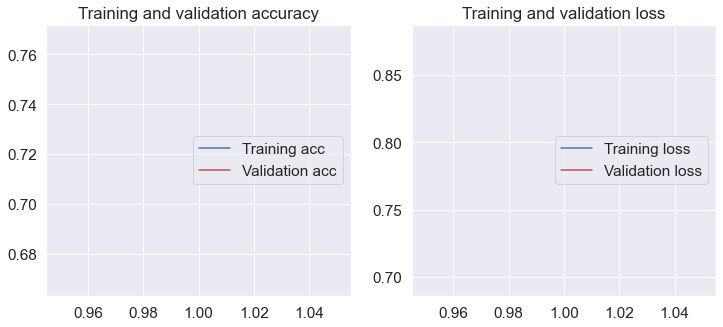

In [36]:
def plot_history(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    print("Lowest Validation Loss: epoch {}".format(np.argmin(val_loss)+1))
    print("Highest Validation Accuracy: epoch {}".format(np.argmax(val_acc)+1))

plot_history(history)

In [41]:
def get_min_val_loss_epoch(history):
    return "0"+str(np.argmin(history.history['val_loss'])+1)

def get_max_val_acc_epoch(history):
    return "0"+str(np.argmax(history.history['val_categorical_accuracy'])+1)

In [44]:
epoch_num = get_max_val_acc_epoch(history)
model.load_weights(output_dir+"/weights."+epoch_num+".hdf5") # Load in model weights

In [46]:
y_test_probs = model.predict(X_test)

# Turn probabilities into an interger prediction
y_hat = []
for prob in y_test_probs:
    y_hat.append(np.argmax(prob))

221/221 [==============================] - 1807s 8s/step


Accuracy: 0.7606172140430351


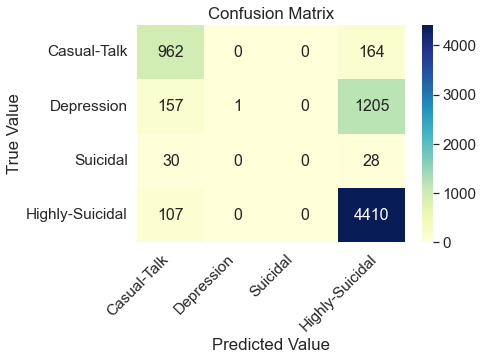

In [47]:
print("Accuracy:", accuracy_score(y_test, y_hat))
print_cf1(y_test, y_hat)

In [48]:
print(classification_report(y_test, y_hat, target_names=labels_5))

                 precision    recall  f1-score   support

    Casual-Talk       0.77      0.85      0.81      1126
     Depression       1.00      0.00      0.00      1363
       Suicidal       0.00      0.00      0.00        58
Highly-Suicidal       0.76      0.98      0.85      4517

       accuracy                           0.76      7064
      macro avg       0.63      0.46      0.42      7064
   weighted avg       0.80      0.76      0.68      7064



In [49]:
[print(example, '\n') for example in x_test[(y_test == 2) & (np.asarray(y_hat) == 0)][:5]];


seriously imagine thing let thank christ honesty thank freak christ talk age stuff year consider suicide self harm thing 

seriously imagine thing let thank christ honesty thank freak christ talk age stuff year consider suicide self harm thing 

life suppose live simple come suddenly dissolve 

seriously imagine thing let thank christ honesty thank freak christ talk age stuff year consider suicide self harm thing 

fear girl sick sick head think want 



# Saving Model

### I cannot load the model after i save it.
### I have tried saving models ways that i know but does not work

In [93]:
from tensorflow.keras.models import save_model, load_model

save_model(model,"test_distilbert2.h5")

model.save("test_distilbert.h5")

model.save("distillbert_hdf5_.hdf5")

model.save('distilbert_test')

INFO:tensorflow:Assets written to: distilbert_test\assets


INFO:tensorflow:Assets written to: distilbert_test\assets


In [94]:
loaded_model=load_model("test_distilbert.h5")

ValueError: Unknown layer: TFDistilBertModel. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
loaded_model2=load_model("test_distilbert2.h5")

In [ ]:
loaded_model3=load_model("distillbert_hdf5_.hdf5")

In [89]:

loaded_model4=load_model("distilbert_test")

ValueError: The two structures don't have the same nested structure.

First structure: type=tuple str=(({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}, None, None, None, None, None, None, False), {})

Second structure: type=tuple str=((TensorSpec(shape=(None, 256), dtype=tf.int32, name='input_ids'), TensorSpec(shape=(None, 256), dtype=tf.int32, name='attention_mask'), None, None, None, None, None, False), {})

More specifically: Substructure "type=dict str={'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}" is a sequence, while substructure "type=TensorSpec str=TensorSpec(shape=(None, 256), dtype=tf.int32, name='input_ids')" is not
Entire first structure:
(({'input_ids': ., 'attention_mask': .}, ., ., ., ., ., ., .), {})
Entire second structure:
((., ., ., ., ., ., ., .), {})

In [ ]:
loaded_model5=load_model("distilbert_test")

### Saving and loading Model as Tensorflow object

In [57]:
tf.saved_model.save(model,"tf_model_save")

INFO:tensorflow:Assets written to: tf_model_save\assets


INFO:tensorflow:Assets written to: tf_model_save\assets


In [67]:
tf_load_model=tf.saved_model.load("tf_model_save")

In [92]:
tf_load_model2=tf.saved_model.load("test_distilbert2.h5")

OSError: SavedModel file does not exist at: test_distilbert2.h5\{saved_model.pbtxt|saved_model.pb}

In [74]:
tf_loaded_model_2 = load_model('distilbert_test')

ValueError: The two structures don't have the same nested structure.

First structure: type=tuple str=(({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}, None, None, None, None, None, None, False), {})

Second structure: type=tuple str=((TensorSpec(shape=(None, 256), dtype=tf.int32, name='input_ids'), TensorSpec(shape=(None, 256), dtype=tf.int32, name='attention_mask'), None, None, None, None, None, False), {})

More specifically: Substructure "type=dict str={'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}" is a sequence, while substructure "type=TensorSpec str=TensorSpec(shape=(None, 256), dtype=tf.int32, name='input_ids')" is not
Entire first structure:
(({'input_ids': ., 'attention_mask': .}, ., ., ., ., ., ., .), {})
Entire second structure:
((., ., ., ., ., ., ., .), {})

In [96]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


INFO:tensorflow:Assets written to: ram://2378dcf8-f3f4-4a10-8327-cd647ed952df/assets


INFO:tensorflow:Assets written to: ram://2378dcf8-f3f4-4a10-8327-cd647ed952df/assets


In [97]:
#Load the model
loaded_model = pickle.load(open(filename, 'rb'))

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://bc9e1780-e6b1-4c33-be8c-c0efa93ef54e/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.